# 사전 준비

## 패키지

In [1]:
import json
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.font_manager as fm
import IPython.display as disp
import squarify

# 그래프 스타일
%matplotlib inline
sns.set(style="whitegrid")

## 폰트

In [2]:
# 폰트 경로 지정
font_path = '../src/KoPubWorld Batang Medium.ttf'

# matplotlib에 폰트 등록
fm.fontManager.addfont(font_path)

# 폰트 이름 확인
prop = fm.FontProperties(fname=font_path)
font_name = prop.get_name()
print(f"matplotlib에 등록된 폰트 이름: {font_name}")

# matplotlib의 기본 폰트 설정
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

matplotlib에 등록된 폰트 이름: KoPubWorldBatang


## 함수

In [3]:
# 만 단위 포맷터
def format_man(x, _):
    return f'{x / 10000:.0f}'

# Code

In [4]:
file_path = "../yelp_dataset/yelp_academic_dataset_business.json"

# total lines 미리 세기 (tqdm 활용)
with open(file_path, 'r', encoding='utf-8') as f:
    total_lines = sum(1 for _ in f)

data = []
with open(file_path, 'r', encoding='utf-8') as f:
    for line in tqdm(f, total=total_lines, desc="Loading users"):
        data.append(json.loads(line))

df = pd.DataFrame(data)

Loading users: 100%|██████████| 150346/150346 [00:01<00:00, 116400.03it/s]


In [5]:
print("데이터 크기:", df.shape)
print("\n컬럼 목록:\n", df.columns.tolist())
print("\n샘플 데이터:")
display(df.head())

데이터 크기: (150346, 14)

컬럼 목록:
 ['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours']

샘플 데이터:


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [6]:
df.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

## 시각화

### 별점 분포

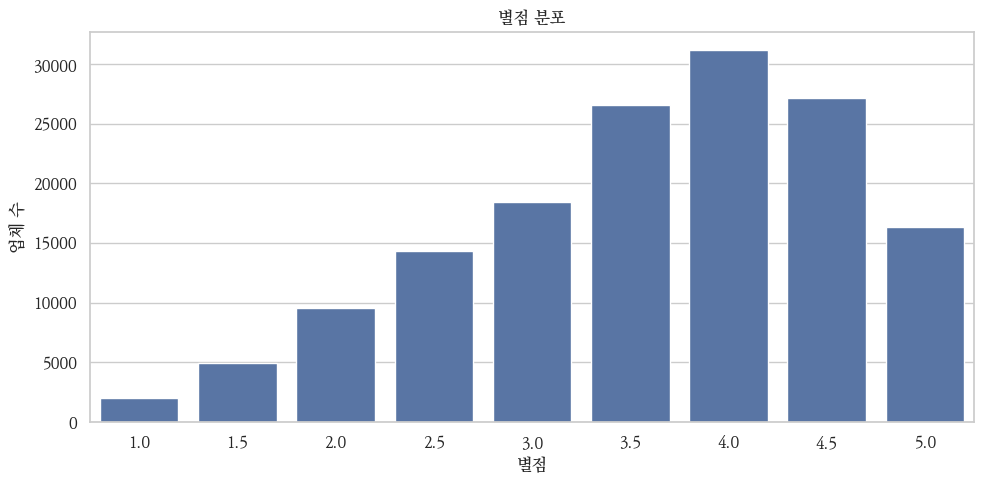

,업체 수,비율 (%)
별점,,
1.0,1986,1.32
1.5,4932,3.28
2.0,9527,6.34
2.5,14316,9.52
3.0,18453,12.27
3.5,26519,17.64
4.0,31125,20.70
4.5,27181,18.08
5.0,16307,10.85



별점 기본 통계


count    150346.000000
mean          3.596724
std           0.974421
min           1.000000
25%           3.000000
50%           3.500000
75%           4.500000
max           5.000000
Name: stars, dtype: float64

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from collections import Counter

# 별점 분포
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='stars', order=sorted(df['stars'].unique()))
plt.title("별점 분포")
plt.xlabel("별점")
plt.ylabel("업체 수")
plt.tight_layout()
plt.show()

# 별점 분포 표
stars_count = df['stars'].value_counts().sort_index()
stars_percent = (stars_count / len(df) * 100).round(2)

stars_summary = pd.DataFrame({
    '업체 수': stars_count,
    '비율 (%)': stars_percent
})
stars_summary.index.name = '별점'

# 기본 통계
stats_summary = df['stars'].describe()

display(stars_summary)
print("\n별점 기본 통계")
display(stats_summary)

### 업체별 리뷰 수

,업체 수,비율 (%)
리뷰 수 구간,,
0개,0,0.00
1–4개,0,0.00
5–9개,51103,33.99
10–19개,37324,24.83
20–49개,32664,21.73
50–99개,14608,9.72
100–199개,8405,5.59
200개 이상,6242,4.15



리뷰 수 기본 통계


count    150346.000000
mean         44.866561
std         121.120136
min           5.000000
25%           8.000000
50%          15.000000
75%          37.000000
max        7568.000000
Name: review_count, dtype: float64

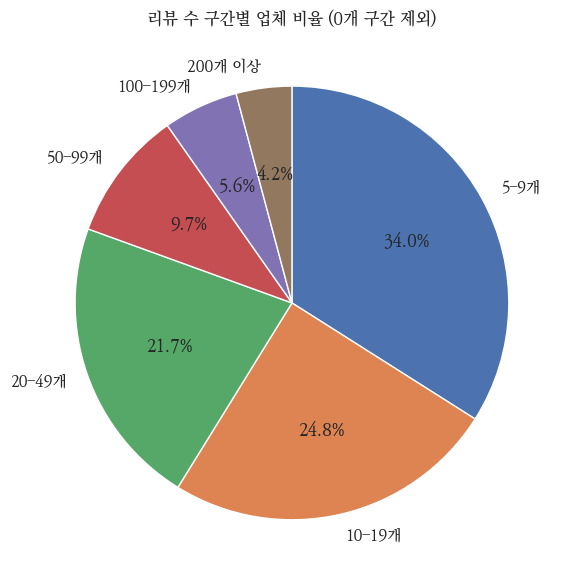

In [8]:
# 구간 경계 설정
bins = [0, 1, 5, 10, 20, 50, 100, 200, df['review_count'].max() + 1]
labels = ["0개", "1–4개", "5–9개", "10–19개", "20–49개", "50–99개", "100–199개", "200개 이상"]

# 구간화
df['review_count_bin'] = pd.cut(
    df['review_count'],
    bins=bins,
    labels=labels,
    right=False
)

# 표 생성
count_table = df['review_count_bin'].value_counts().reindex(labels)
percent_table = (count_table / len(df) * 100).round(2)

review_summary = pd.DataFrame({
    '업체 수': count_table,
    '비율 (%)': percent_table
})
review_summary.index.name = '리뷰 수 구간'

# 기본 통계
stats_summary = df['review_count'].describe()

# 출력
display(review_summary)
print("\n리뷰 수 기본 통계")
display(stats_summary)

# 업체 수가 0보다 큰 구간만 필터링
review_summary_nonzero = review_summary[review_summary['업체 수'] > 0]

# 원형 그래프
plt.figure(figsize=(6, 6))
plt.pie(
    review_summary_nonzero['업체 수'],
    labels=review_summary_nonzero.index,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)
plt.title("리뷰 수 구간별 업체 비율 (0개 구간 제외)")
plt.tight_layout()
plt.show()


**별점과 리뷰 수 상관계수**

|             | stars     | review_count |
|-------------|-----------|--------------|
| **stars**   | 1.000000  | 0.059876     |
| **review_count** | 0.059876  | 1.000000     |

- 별점과 리뷰 수 간 선형 상관관계가 거의 없음

### 주별 업체

In [9]:
# 주별 업체 수 전체 표
state_counts_full = df['state'].value_counts()
state_percent_full = (state_counts_full / len(df) * 100).round(2)
state_summary = pd.DataFrame({
    '업체 수': state_counts_full,
    '비율 (%)': state_percent_full
})
state_summary.index.name = '주'
display(state_summary)

,업체 수,비율 (%)
주,,
PA,34039,22.64
FL,26330,17.51
TN,12056,8.02
IN,11247,7.48
MO,10913,7.26
LA,9924,6.60
AZ,9912,6.59
NJ,8536,5.68
NV,7715,5.13


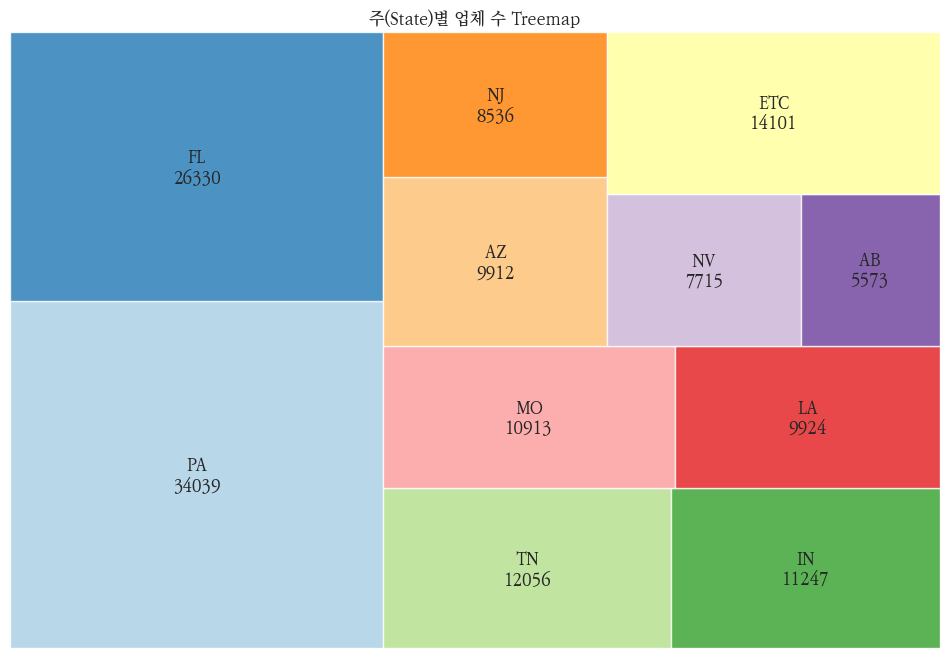

In [10]:
# 주별 개수 계산
state_counts = df['state'].value_counts()

# 상위 10개 주
top_states = state_counts.head(10)

# 나머지 합산 → ETC
etc_count = state_counts.iloc[10:].sum()

# Series 합치기
treemap_data = pd.concat([top_states, pd.Series({"ETC": etc_count})])

# Treemap 그리기
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=treemap_data.values,
    label=[f"{state}\n{count}" for state, count in treemap_data.items()],
    alpha=0.8,
    color=sns.color_palette("Paired", len(treemap_data))
)
plt.axis('off')
plt.title("주(State)별 업체 수 Treemap")
plt.show()


### 도시별 업체

도시 이름 전처리

In [11]:
# NaN → 'Unknown' 처리 후 고유 도시명 정렬
unique_cities = sorted(df['city'].fillna('Unknown').unique())

print(f"고유 도시 수: {len(unique_cities)}개")
print(unique_cities)

고유 도시 수: 1416개
['AB Edmonton', 'AMBLER', 'ARDMORE', 'AVON', 'Abington', 'Abington Township', 'Affton', 'Afton', 'Alberta Park Industrial', 'Aldan', 'Algiers', 'Aliso Viejo', 'Alloway', 'Almonesson', 'Alton', 'Ambler', 'Andalusia', 'Antioch', 'Apollo Beach', 'Apollo beach', 'Apopka', 'Arabi', 'Arden', 'Ardmore', 'Arizona', 'Arnold', 'Arrington', 'Ashland', 'Ashland City', 'Aston', 'Atco', 'Audubon', 'Audubon ', 'Austin', 'Avon', 'Avondale', 'BOISE', 'BOISE AP', 'BRANDON', 'Bala Cynwyd', 'Ballwin', 'Balm', 'Bargersville', 'Barnhart', 'Barrington', 'Barto', 'Bayonet Point', 'Bear', 'Beaumont', 'Beech Grove', 'Beech Grove,', 'Bel Ridge', 'Bellair', 'Belle Chase', 'Belle Chasse', 'Belle Meade', 'Belleair', 'Belleair Beach', 'Belleair Blf', 'Belleair Bluffs', 'Belleair Blufs', 'Bellefontaine', 'Bellefontaine Neighbors', 'Bellefonte', 'Belleville', 'Belleville ', 'Bellevue', 'Bellmawr', 'Bellville', 'Belmont Hills', 'Bennington', 'Bensalem', 'Bensalem Township', 'Bensalem. Pa', 'Berkeley', 'B

In [12]:
def standardize_city_name(city_name):
    """
    도시 이름을 소문자로 변환하고, 비슷한 이름들을 하나의 표준화된 이름으로 통일하는 함수
    """
    # NaN 또는 'Unknown' 값을 먼저 처리
    if pd.isna(city_name) or city_name == 'Unknown':
        return 'unknown'
        
    # 일관된 비교를 위해 모두 소문자로 변환
    city_name_lower = str(city_name).lower().strip()
    
    # 중복되는 이름을 표준화된 이름으로 매핑하는 딕셔너리
    standard_names = {
        'abington': 'abington', 'edmonton': 'edmonton', 'ambler': 'ambler', 'ardmore': 'ardmore',
        'boise': 'boise', 'bryn mawr': 'bryn mawr', 'cheltenham': 'cheltenham', 'clearwater': 'clearwater',
        'conshohocken': 'conshohocken', 'creve coeur': 'creve coeur', 'donelson': 'donelson', 'feasterville': 'feasterville',
        'king of prussia': 'king of prussia', 'land o lakes': 'land o lakes', 'mount juliet': 'mount juliet',
        'nashville': 'nashville', 'new orleans': 'new orleans', 'philadelphia': 'philadelphia', 'reno': 'reno',
        'saint louis': 'saint louis', 'tampa': 'tampa', 'tucson': 'tucson', 'bensalem': 'bensalem',
        'cherry hill': 'cherry hill', 'deptford': 'deptford', 'downingtown': 'downingtown', 'dunedin': 'dunedin',
        'havertown': 'havertown', 'indianapolis': 'indianapolis', 'largo': 'largo', 'maryland heights': 'maryland heights',
        'pennsauken': 'pennsauken', 'pottstown': 'pottstown', 'redington shores': 'redington shores',
        'safety harbor': 'safety harbor', 'santa barbara': 'santa barbara', 'sewell': 'sewell',
        'spring hill': 'spring hill', 'willingboro': 'willingboro', 'wilmington': 'wilmington',
        
        # 기존 매핑 규칙
        'abington township': 'abington',
        'affton': 'afton',
        'alonesson': 'almonesson',
        'belleair bluffs': 'belleair',
        'belleair blf': 'belleair',
        'belleair blufs': 'belleair',
        'belleville': 'belleville',
        'belleville ': 'belleville',
        'bensalem. pa': 'bensalem',
        'bosie': 'boise',
        'boisecity': 'boise',
        'brandon': 'brandon',
        'broomall': 'broomall',
        'brookhaven': 'brookhaven',
        'brooklawn': 'brooklawn',
        'buckingham': 'buckingham',
        'burlington': 'burlington',
        'carneys point': 'carneys point',
        'chalmette': 'chalfont',
        'chalemette': 'chalfont',
        'cherry hil': 'cherry hill',
        'chester heights': 'chester',
        'chester springs': 'chester',
        'claerwater': 'clearwater',
        'clearwater beach': 'clearwater',
        'clearwater countryside': 'clearwater',
        'conshohoeken': 'conshohocken',
        'creve couer': 'creve coeur',
        'delran township': 'delran',
        'delran twp': 'delran',
        'deptford township': 'deptford',
        'deptford twp': 'deptford',
        'drexel hil': 'drexel hill',
        'east norristown': 'norristown',
        'e. norristown': 'norristown',
        'feasterville-trevose': 'feasterville',
        'feastville': 'feasterville',
        'festerville': 'feasterville',
        'fairless': 'fairless hills',
        'fort washington': 'fort washington',
        'franklin ': 'franklin',
        'gilbertsville': 'gilbertsville',
        'gloucester': 'gloucester',
        'goodlettsville': 'goodlettsville',
        'havertown, pa': 'havertown',
        'horsham': 'horsham',
        'huntingdon valley': 'huntingdon valley',
        'indianapolis city (balance)': 'indianapolis',
        'indianpolis': 'indianapolis',
        'king of prussi': 'king of prussia',
        'kng of prusia': 'king of prussia',
        'land o lakes': 'land o lakes',
        'land o lakes,': 'land o lakes',
        'land o lakes': 'land o lakes',
        'langhorne': 'langhorne',
        'largo (walsingham)': 'largo',
        'lawrence township': 'lawrence',
        'lutz fl': 'lutz',
        'maple shade township': 'maple shade',
        'maryland height': 'maryland heights',
        'meridian': 'meridian',
        'metairie': 'metairie',
        'monroe township': 'monroe',
        'mount holly': 'mount holly',
        'mt holly': 'mount holly',
        'mt. holly': 'mount holly',
        'mount juliet': 'mount juliet',
        'mt juliet': 'mount juliet',
        'mt. juliet': 'mount juliet',
        'mount laurel': 'mount laurel',
        'mt laurel': 'mount laurel',
        'nashville-davidson metropolitan government (balance)': 'nashville',
        'new orlaens': 'new orleans',
        'new prt rchy': 'new port richey',
        'new pt richey': 'new port richey',
        'newtown square': 'newtown',
        'newtown sq': 'newtown',
        'nolenville': 'nolensville',
        'norristown': 'norristown',
        'norriton': 'norristown',
        'o fallon': "o'fallon",
        "o' fallon": "o'fallon",
        'ofallon': "o'fallon",
        'palm harbor': 'palm harbor',
        'palm harbor, fl': 'palm harbor',
        'pennsauken township': 'pennsauken',
        'phila': 'philadelphia',
        'philiadelphia': 'philadelphia',
        'philly': 'philadelphia',
        'phoenixville': 'phoenixville',
        'primos': 'primos',
        'redington beach': 'redington shores',
        'redington shores': 'redington shores',
        'reno ': 'reno',
        'reno nevada': 'reno',
        'saint louis': 'saint louis',
        'st louis': 'saint louis',
        'saint petersburg': 'saint petersburg',
        'st petersburg': 'saint petersburg',
        'santa barbara': 'santa barbara',
        'sewell': 'sewell',
        'sparks': 'sparks',
        'spring hill': 'spring hill',
        'tampa': 'tampa',
        'tampa,fl': 'tampa',
        'tucson': 'tucson',
        'tuscon': 'tucson',
        'unknown': 'unknown',
        'wesley chapel': 'wesley chapel',
        'west chester': 'west chester',
        'w. chester': 'west chester',
        'willingboro': 'willingboro',
        'wilmington': 'wilmington',
        'yardley': 'yardley',
        'zephryhills': 'zephyrhills',
        '\u200bclayton': 'clayton',
        '\u200blargo': 'largo',
        '\u200blithia': 'lithia',
        'alberta park industrial': 'boise',
        'bala cynwyd': 'bryn mawr',
        'bellair': 'belleair',
        'belleair beach': 'belleair',
        'bellville': 'belleville',
        'chester township': 'chester',
        'chesterbrook': 'chester',
        'cynwyd': 'bryn mawr',
        'drexel': 'drexel hill',
        'fort saskatchewan': 'edmonton',
        'old strathcona': 'edmonton',
        'pilot sound area west portion': 'edmonton',
        'saint albert': 'edmonton',
        'st albert': 'edmonton',
        'st. albert': 'edmonton',
        'saint\xa0albert': 'edmonton',
        'sturgeon couny': 'edmonton',
        'newton': 'newtown',
        'newtown township': 'newtown',
        'phonixville': 'phoenixville',
        'redingtn shor': 'redington shores',
        'redington shore': 'redington shores',
        'saintt petersburg': 'saint petersburg',
        'st petersberg': 'saint petersburg',
        'st petersurg': 'saint petersburg',
        'santa barbra': 'santa barbara',
        'santa  barbara': 'santa barbara',
        'springhill': 'spring hill',
        'st. loius': 'saint louis',
        'st.louis': 'saint louis',
        'saint\xa0louis': 'saint louis',
        'wilimington': 'wilmington',
        
        # 새로운 매핑 규칙
        'belle chase': 'belle chasse',
        'beech grove,': 'beech grove',
        'bordentown township': 'bordentown',
        'bristol twp': 'bristol',
        'cornwells hts': 'cornwells heights',
        'eagle,': 'eagle',
        'eastampton township': 'eastampton',
        'evesham township': 'evesham',
        'evshm twp': 'evesham',
        'ewing township': 'ewing',
        'ewing twp': 'ewing',
        'goodletsville': 'goodlettsville',
        'had twp': 'haddon',
        'haddon township': 'haddon',
        'haddon twp': 'haddon',
        'haverford,': 'haverford',
        'haverton': 'haverford',
        'indianopolis': 'indianapolis',
        'inpolis': 'indianapolis',
        'landsale': 'lansdale',
        'landsdale': 'lansdale',
        'metarie': 'metairie',
        'meterie': 'metairie',
        'mt ephraim': 'mount ephraim',
        'mt. ephraim': 'mount ephraim',
        'n redington bch': 'north redington bch',
        'n redngtn bch': 'north redington bch',
        'old hickory, tn': 'old hickory',
        'oldmans township': 'oldmans',
        'pennsville township': 'pennsville',
        'plymouth mtng': 'plymouth meeting',
        'royford': 'royersford',
        's pasadena': 'south pasadena',
        's.pasadena': 'south pasadena',
        'saint ann': 'saint ann',
        'st ann': 'saint ann',
        'st. ann': 'saint ann',
        'st.ann': 'saint ann',
        'saint charles': 'saint charles',
        'st charles': 'saint charles',
        'st. charles': 'saint charles',
        'st.charles': 'saint charles',
        'saint pete beach': 'saint pete beach',
        'st pete beach': 'saint pete beach',
        'st. pete beach': 'saint pete beach',
        'st.pete beach': 'saint pete beach',
        'saint peters': 'saint peters',
        'st. peters': 'saint peters',
        'saint rose': 'saint rose',
        'st rose': 'saint rose',
        'st. rose': 'saint rose',
        'st.rose': 'saint rose',
        'southhampton': 'southampton',
        'southampton township': 'southampton',
        'town & county': 'town & country',
        'town \'n\' country': 'town & country',
        'town and country': 'town & country',
        'twn n cntry': 'town & country',
        'upper darby pa': 'upper darby',
        'upper southampton township': 'upper southampton',
        'wesley ccapel': 'wesley chapel',
        'w.chester': 'west chester',
        'woodbury hts': 'woodbury heights',
        'woodbury hts.': 'woodbury heights',
        'woolwich twp': 'woolwich township',
        'woolwich twp.': 'woolwich township',
        'zieglersville': 'zieglerville',
        
        # 4차
        'bellefontaine': 'bellefontaine neighbors',
        'brentwood - cool springs': 'brentwood',
        'carney\'s point': 'carneys point',
        'casa adobes': 'casas adobes',
        'cedar brook': 'cedarbrook',
        'fairview hts': 'fairview heights',
        'fairview hts.': 'fairview heights',
        'french quarter - cbd': 'french quarter',
        'glen mills': 'glenn mills',
        'glenoldan': 'glenolden',
        'greater carrollwood': 'carrollwood',
        'greater northdale': 'northdale',
        'green valle': 'green valley',
        'haddon': 'haddonfield',
        'hadden': 'haddonfield',
        'hamiltion': 'hamilton',
        'hernando bch': 'hernando beach',
        'hi nella': 'hi-nella',
        'huntington valley': 'huntingdon valley',
        'indian rocks beach.': 'indian rocks beach',
        'kimmiswick': 'kimmswick',
        'madiera beach': 'madeira beach',
        'mt  juliet': 'mount juliet',
        'mt. airy': 'mount airy',
        'mt. laurel': 'mount laurel',
        'mt.juliet': 'mount juliet',
        'mt.laurel': 'mount laurel',
        'nsshville': 'nashville',
        'pass-a-grille': 'pass-a-grille beach',
        'pennsaulen': 'pennsauken',
        'philiidelphia': 'philadelphia',
        'st  louis': 'saint louis',
        'st pete': 'saint petersburg',
        'st.  charles': 'saint charles',
        'st. davids': 'saint davids',
        'st. leo': 'saint leo',
        'st. louis': 'saint louis',
        'st. louis county': 'saint louis',
        'st. pete': 'saint petersburg',
        'st.petersburg': 'saint petersburg',
        'staint albert': 'edmonton',
        'tampla': 'tampa',
        'temple terr': 'temple terrace',
        'thonosassa': 'thonotosassa',
        'tierre verde': 'tierra verde',
        'town n country': 'town & country',
        'treasure is': 'treasure island',
        'tren': 'trenton',
        'tuson': 'tucson',
        'westmont - haddon towsship': 'westmont',
        'zionsville in': 'zionsville',
        
        # 5차
        'berlin boro': 'berlin',
        'berlin township': 'berlin',
        'bethel township': 'bethel',
        'blvd': 'boulevard',
        'bucks': 'bucks county',
        'concord township': 'concordville',
        'concord village': 'concordville',
        'devon-berwyn': 'devon',
        'east st. louis': 'saint louis',
        'erdenheim pa': 'erdenheim',
        'haddon heights': 'haddonfield',
        'hamilton township': 'hamilton',
        'lemay ferry': 'lemay',
        'lower gwynedd township': 'lower gwynedd',
        'maple shade nj': 'maple shade',
        'mehlville': 'mehville',
        'merion': 'merion station',
        'merion park': 'merion station',
        'moorestown-lenola': 'moorestown',
        'north coventry township': 'north coventry',
        'north maple shade': 'maple shade',
        'north marlton': 'marlton',
        'pittsgrove township': 'pittsgrove',
        'ridley': 'ridley township',
        'ridley park': 'ridley township',
        'river view': 'riverview',
        'riveridge': 'riverview',
        'riverview fl': 'riverview',
        'safety  harbor': 'safety harbor',
        'safety hatbor': 'safety harbor',
        'scott air force base': 'scott afb',
        'south cinnaminson': 'cinnaminson',
        'south harrison township': 'harrison township',
        'tinicum': 'tinicum township',
        'upper merion township': 'upper merion',
        'upper moreland': 'upper moreland township',
        'upper pittsgrove': 'pittsgrove',
        'upper pottsgrove': 'pottsgrove',
        'voorhees township': 'voorhees',
        'washington twp': 'washington township',
        'west bradford township': 'west bradford',
        'westampton township': 'westampton',
        'webster grvs': 'webster groves',
        
        # 6차
        'bucks county': 'buckingham',
        'land o lakes': 'land o lakes',
        "land o' lakes": 'land o lakes',
        "land o' lakes,": 'land o lakes',
        "land o'lakes": 'land o lakes',
        'land-o-lakes': 'land o lakes',
        'new britian': 'new britain',
        'norritown': 'norristown',
        'north redington bch': 'redington shores',
        'plainfiled': 'plainfield',
        'south county': 'saint louis',
        'upper moreland township': 'upper moreland',
        'w. berlin': 'west berlin',
        'west collingswood heights': 'haddonfield',
        'west hill': 'west chester',
        
        # 7차
        'bucks county': 'buckingham',
        'north redington bch': 'redington shores',
        'upper moreland township': 'upper moreland',
        'meridan': 'meridian',
        'new castle': 'newcastle',
        'new britian': 'new britain',
        'west point': 'west chester',
        
        # 8차
        'bucks county': 'buckingham',
        'north redington bch': 'redington shores',
        'upper moreland township': 'upper moreland'
    }
    
    # 딕셔너리를 순회하며 일치하는 이름을 찾고, 표준화된 이름을 반환
    for key, standardized_name in standard_names.items():
        if key in city_name_lower:
            return standardized_name
            
    # 일치하는 이름이 없을 경우 원래의 소문자 이름을 반환
    return city_name_lower

# 'city' 컬럼에 위 함수를 적용하여 새로운 'city2' 컬럼 생성
df['city2'] = df['city'].apply(standardize_city_name)

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

# 전체 도시별 업체 수 표 (NaN은 'Unknown'으로 처리)
city_counts_full = df['city2'].fillna('Unknown').value_counts()
city_percent_full = (city_counts_full / len(df) * 100).round(2)

city_summary = pd.DataFrame({
    '업체 수': city_counts_full,
    '비율 (%)': city_percent_full
})
city_summary.index.name = '도시'

display(city_summary)

,업체 수,비율 (%)
도시,,
philadelphia,14606,9.71
tucson,9292,6.18
tampa,9227,6.14
indianapolis,7554,5.02
nashville,6990,4.65
...,...,...
gardenville,1,0.00
pleasant township,1,0.00
gulph mills,1,0.00


In [14]:
# NaN → 'Unknown' 처리 후 고유 도시명 정렬
unique_cities = sorted(df['city2'].fillna('Unknown').unique())

print(f"고유 도시 수: {len(unique_cities)}개")
print(unique_cities)

고유 도시 수: 864개
['abington', 'afton', 'aldan', 'algiers', 'aliso viejo', 'alloway', 'almonesson', 'alton', 'ambler', 'andalusia', 'antioch', 'apollo beach', 'apopka', 'arabi', 'arden', 'ardmore', 'arizona', 'arnold', 'arrington', 'ashland', 'ashland city', 'aston', 'atco', 'audubon', 'austin', 'avon', 'avondale', 'ballwin', 'balm', 'bargersville', 'barnhart', 'barrington', 'barto', 'bayonet point', 'bear', 'beaumont', 'beech grove', 'bel ridge', 'belle chasse', 'belle meade', 'belleair', 'bellefontaine neighbors', 'bellefonte', 'belleville', 'bellevue', 'bellmawr', 'belmont hills', 'bennington', 'bensalem', 'berkeley', 'berlin', 'berry hill', 'berwyn', 'bethalto', 'bethel', 'beverly', 'birchrunville', 'black jack', 'blackwood', 'blooming glen', 'blue bell', 'boise', 'boone', 'boothwyn', 'bordentown', 'boston', 'boulevard', 'boutte', 'boyertown', 'bradenton', 'bradenton beach', 'brandon', 'breckenridge hills', 'brentwood', 'bridge city', 'bridgeport', 'bridgeton', 'bristol', 'brookhaven',

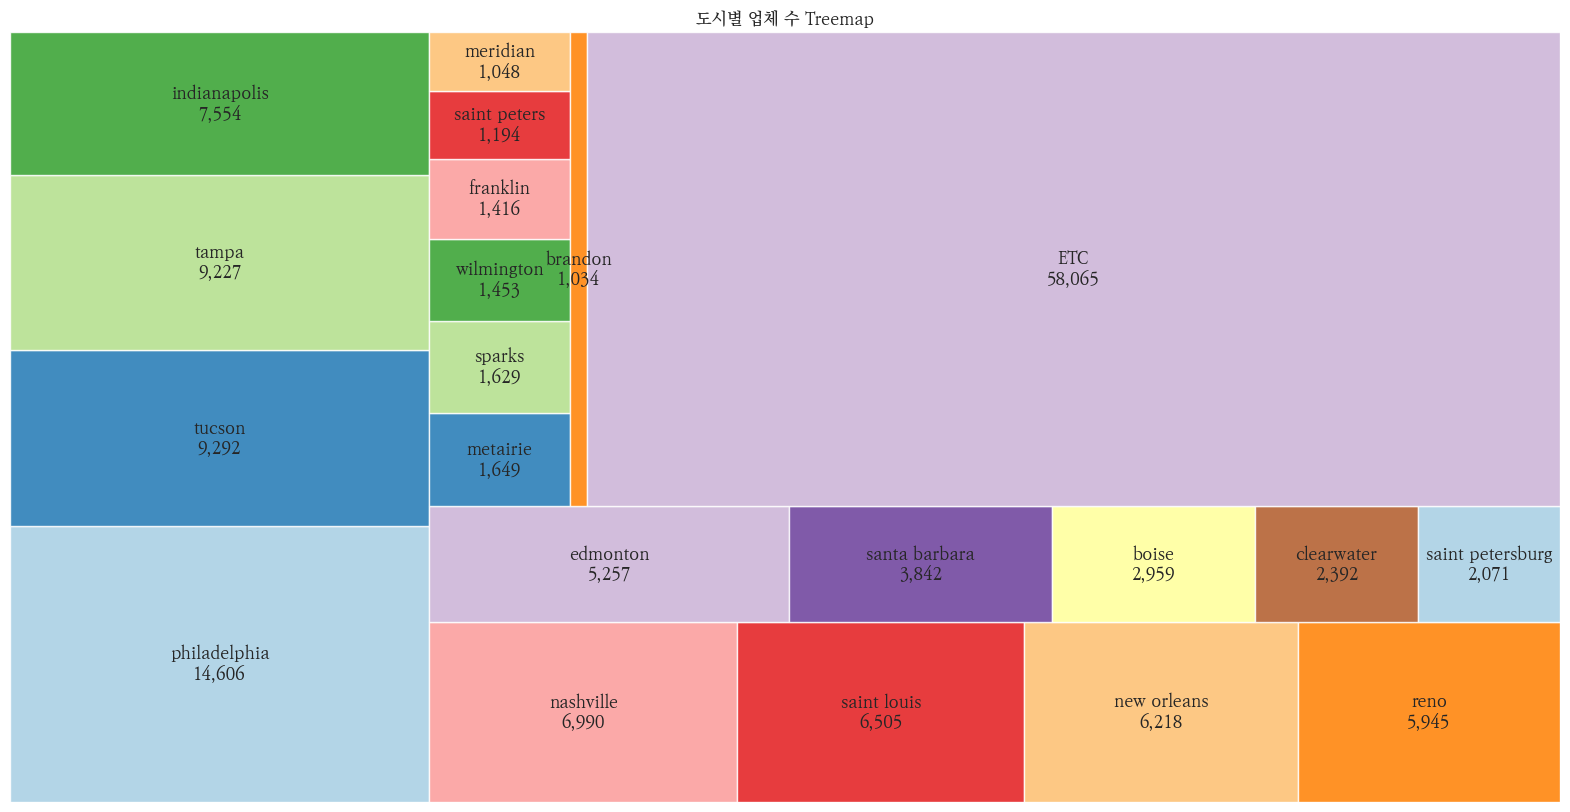

In [15]:
# Top20 + ETC 트리맵
top_n = 20
top_cities = city_counts_full.head(top_n)
etc_count = city_counts_full.iloc[top_n:].sum()
treemap_data = pd.concat([top_cities, pd.Series({'ETC': etc_count})])

plt.figure(figsize=(20, 10))
squarify.plot(
    sizes=treemap_data.values,
    label=[f"{name}\n{count:,}" for name, count in treemap_data.items()],
    color=sns.color_palette("Paired", len(treemap_data)),
    alpha=0.85
)
plt.axis('off')
plt.title("도시별 업체 수 Treemap")
plt.show()

### 카테고리 빈도

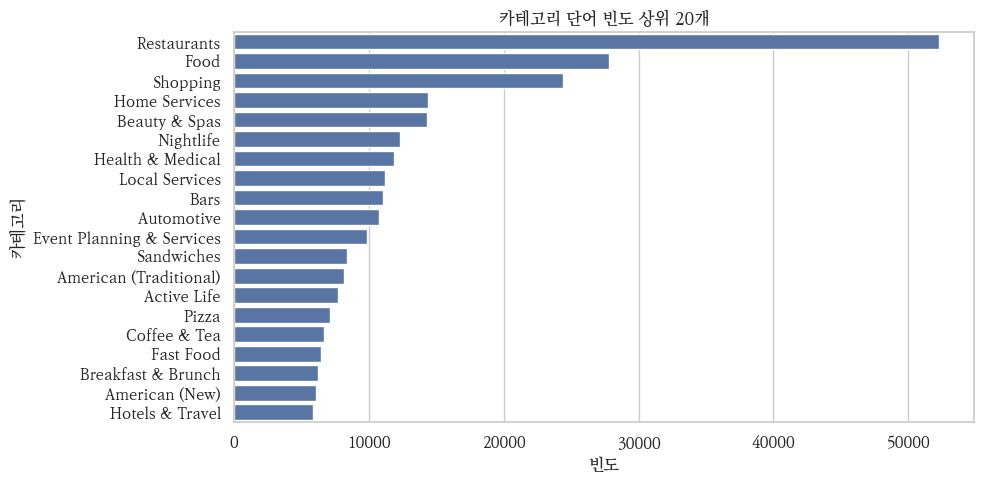

In [16]:
# 카테고리 단어 빈도 분석
all_categories = df['categories'].dropna().str.split(', ')
all_words = [word for cat_list in all_categories for word in cat_list]
category_counts = Counter(all_words)
category_df = pd.DataFrame(category_counts.items(), columns=['카테고리', '빈도']).sort_values(by='빈도', ascending=False).head(20)

plt.figure(figsize=(10, 5))
sns.barplot(data=category_df, x='빈도', y='카테고리')
plt.title("카테고리 단어 빈도 상위 20개")
plt.xlabel("빈도")
plt.ylabel("카테고리")
plt.tight_layout()
plt.show()

## 기타